In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from datetime import datetime, date, time
from sklearn.model_selection import train_test_split

This is the initial EDA of the sales and shipment of products and building of models for determining the shipping cost based on the container type used to send the goods

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df

,Order ID,Customer ID,Sales Person,Order Date,Ship Date,Order Priority,SKU Code,Order Quantity,Unit Sell Price,Unit Cost Price,Discount Percent,Shipping Amount,Ship Mode,Container,Cost,Discount Amount,Discount Cost,Total Discounted Cost
0,13729,C508,Mr Robert Carlton,1/1/2017,1/3/2017,Not Specified,SKU947,9,95.99,1,8%,35.00,Express Air,Large Box,863.91,69.1128,794.7972,829.7972
1,28774,C372,Miss Roseanna Marr,1/1/2017,1/2/2017,High,SKU937,32,5.98,1,10%,4.69,Regular Air,Small Box,191.36,19.1360,172.2240,176.9140
2,9285,C212,Mr Robert Carlton,1/2/2017,1/4/2017,Critical,SKU363,3,40.98,6,6%,2.99,Regular Air,Small Box,122.94,7.3764,115.5636,118.5536
3,37537,C015,Mr Robert Carlton,1/2/2017,1/2/2017,Low,SKU052,4,291.73,58,0%,48.80,Delivery Truck,Jumbo Drum,1166.92,0.0000,1166.9200,1215.7200
4,37537,C015,Mr Robert Carlton,1/2/2017,1/4/2017,Low,SKU063,43,100.98,45,7%,45.00,Delivery Truck,Jumbo Drum,4342.14,303.9498,4038.1902,4083.1902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Mr Robert Carlton,12/30/2020,12/30/2020,Low,SKU979,31,19.98,9,0%,4.00,Regular Air,Small Box,619.38,0.0000,619.3800,623.3800
8395,49344,C494,Mr Robert Carlton,12/30/2020,12/30/2020,Low,SKU883,1,832.81,14,9%,24.49,Regular Air,Medium Box,832.81,74.9529,757.8571,782.3471
8396,47815,C377,Mrs Gail Johnson,12/30/2020,12/30/2020,Not Specified,SKU114,45,13.73,5,8%,6.85,Regular Air,Wrap Bag,617.85,49.4280,568.4220,575.2720
8397,50950,C768,Mrs Gail Johnson,12/30/2020,12/30/2020,Not Specified,SKU066,6,60.98,5,6%,30.00,Delivery Truck,Jumbo Drum,365.88,21.9528,343.9272,373.9272


In [5]:
#Let's get a better understanding of the data
df.describe()

,Order ID,Order Quantity,Unit Sell Price,Unit Cost Price,Shipping Amount,Cost,Discount Amount,Discount Cost,Total Discounted Cost
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,29965.183950,25.571735,89.346259,22.737826,12.838557,1846.312055,91.276222,1755.035833,1767.874390
std,17260.883221,14.481071,290.354383,92.055619,17.264052,3710.265557,219.699498,3538.264045,3545.674373
min,3.000000,1.000000,0.990000,1.000000,0.490000,1.480000,0.000000,1.465200,2.165200
25%,15011.500000,13.000000,6.480000,2.000000,3.300000,140.150000,3.787500,133.221700,138.570550
50%,29857.000000,26.000000,20.990000,4.000000,6.070000,450.890000,16.128000,427.700000,437.350000
75%,44596.000000,38.000000,85.990000,18.000000,13.990000,1781.645000,72.720750,1681.944050,1705.749900
max,59973.000000,50.000000,6783.020000,3159.000000,164.730000,88179.260000,4883.774400,88179.260000,88203.750000


In [6]:
df.shape

(8399, 18)

In [7]:
#Data format of the columns
df.dtypes

Order ID                   int64
Customer ID               object
Sales Person              object
Order Date                object
Ship Date                 object
Order Priority            object
SKU Code                  object
Order Quantity             int64
Unit Sell Price          float64
Unit Cost Price            int64
Discount Percent          object
Shipping Amount          float64
Ship Mode                 object
Container                 object
Cost                     float64
Discount Amount          float64
Discount Cost            float64
Total Discounted Cost    float64
dtype: object

In [9]:
#Checking if there is any missing values in the data
df.isnull().sum()

Order ID                 0
Customer ID              0
Sales Person             0
Order Date               0
Ship Date                0
Order Priority           0
SKU Code                 0
Order Quantity           0
Unit Sell Price          0
Unit Cost Price          0
Discount Percent         0
Shipping Amount          0
Ship Mode                0
Container                0
Cost                     0
Discount Amount          0
Discount Cost            0
Total Discounted Cost    0
dtype: int64

In [10]:
df['Ship Mode'].value_counts()

Regular Air       6270
Delivery Truck    1146
Express Air        983
Name: Ship Mode, dtype: int64

In [11]:
df['SKU Code'].value_counts()[:15]

SKU042     24
SKU221     22
SKU189     22
SKU879     22
SKU228     22
SKU456     21
SKU974     20
SKU1237    20
SKU483     19
SKU072     19
SKU1034    19
SKU1203    19
SKU558     19
SKU1059    18
SKU977     18
Name: SKU Code, dtype: int64

In [12]:
df['Container'].value_counts()

Small Box     4347
Wrap Bag      1168
Small Pack     956
Jumbo Drum     624
Jumbo Box      532
Large Box      406
Medium Box     366
Name: Container, dtype: int64

## Data visualization

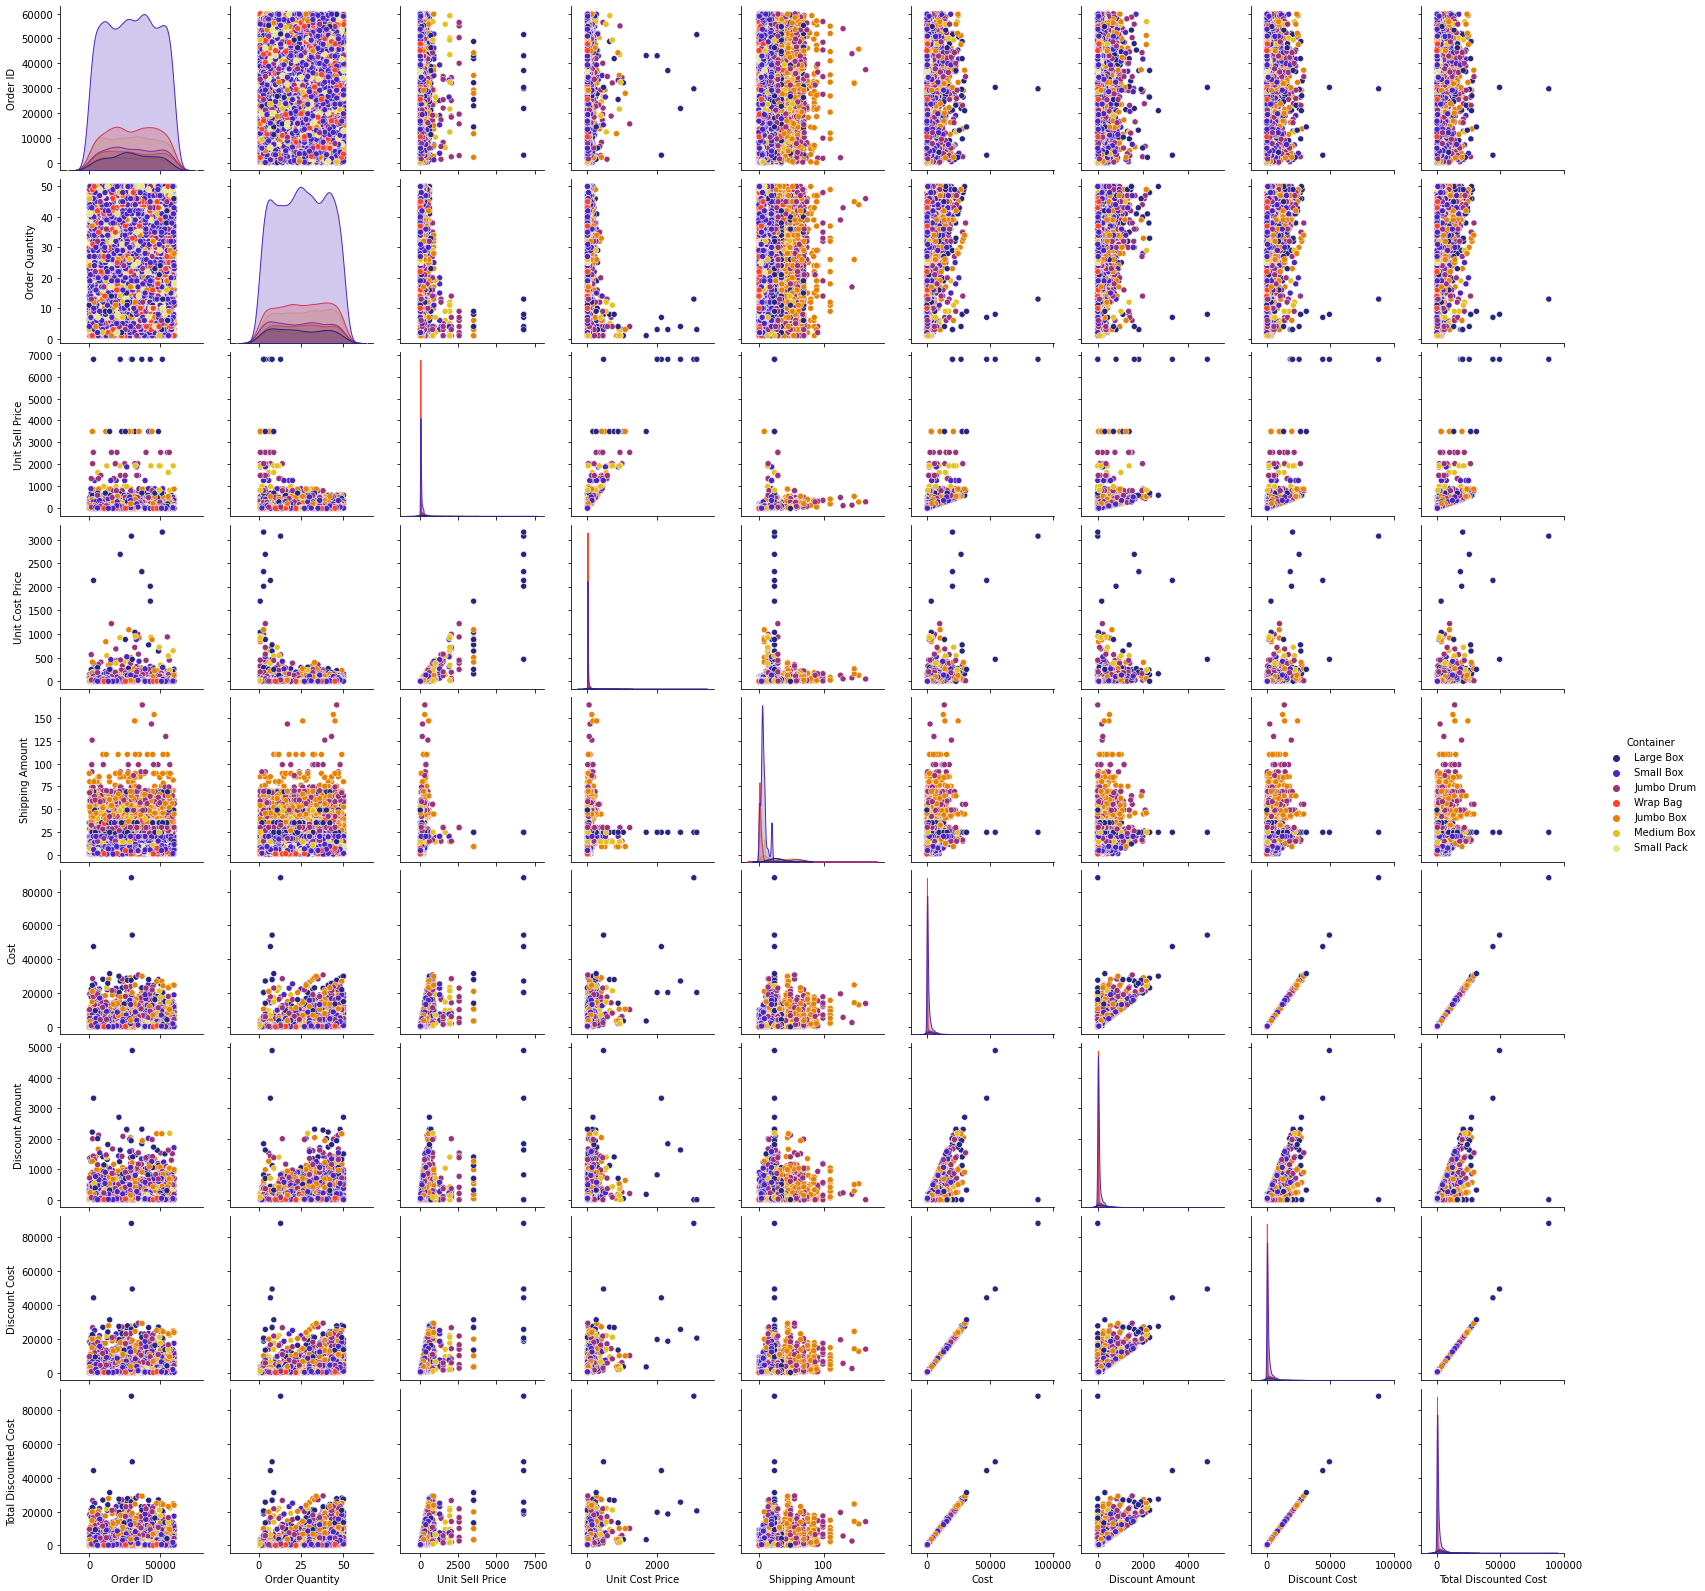

In [5]:
#Pair plot
sns.pairplot(df, hue = 'Container', palette = "CMRmap")
plt.show()

C:\Users\Damilola Ayodele\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


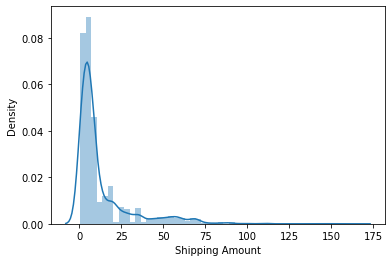

In [4]:
#Plot showing the distribution of the shipping amount
sns.distplot(df['Shipping Amount'])
plt.show()

C:\Users\Damilola Ayodele\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


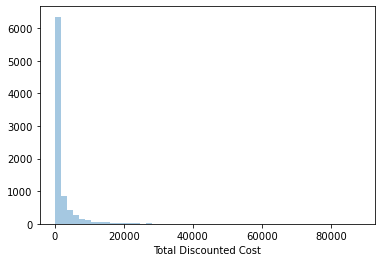

In [6]:
#Plot showing the distribution of the Total amount
sns.distplot(df['Total Discounted Cost'], kde = False)
plt.show()

As seen in below, small box containers are the most used means of delivery regardless of the shipping mode

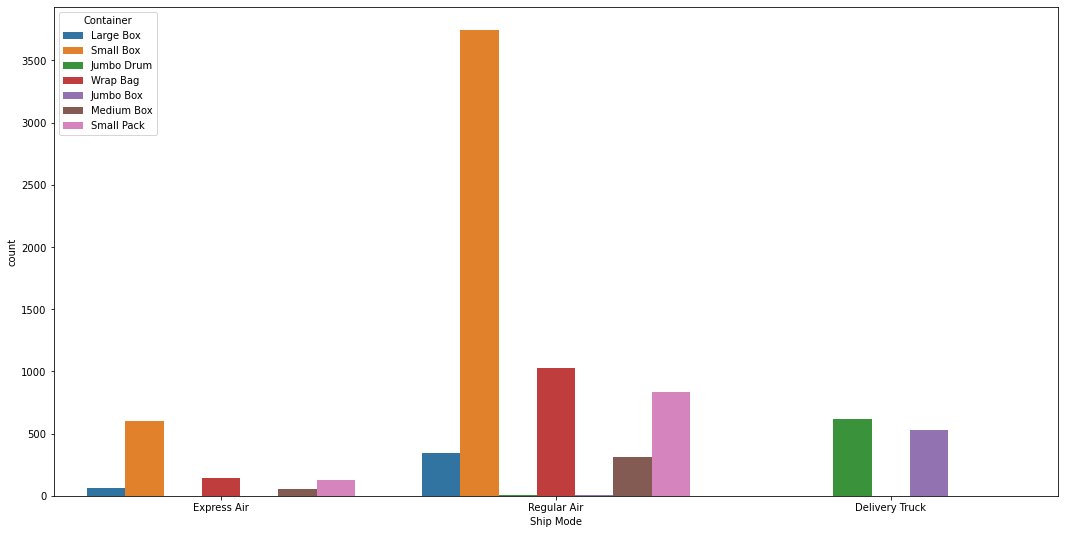

In [7]:
plt.figure(figsize = (18,9))
sns.countplot(x= 'Ship Mode', hue = 'Container', data = df)
plt.show()

The box plot below shows that with regards to shipping amount and container there are sevreal outliers but this can be attributed to the order quatity

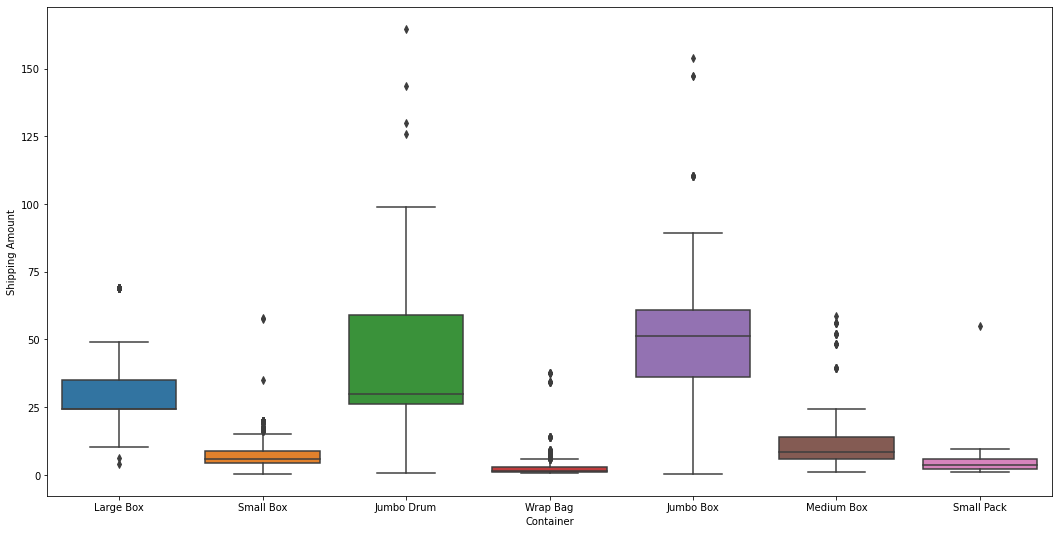

In [8]:
plt.figure(figsize = (18,9))
sns.boxplot(x = "Container", y = "Shipping Amount", data = df)
plt.show()

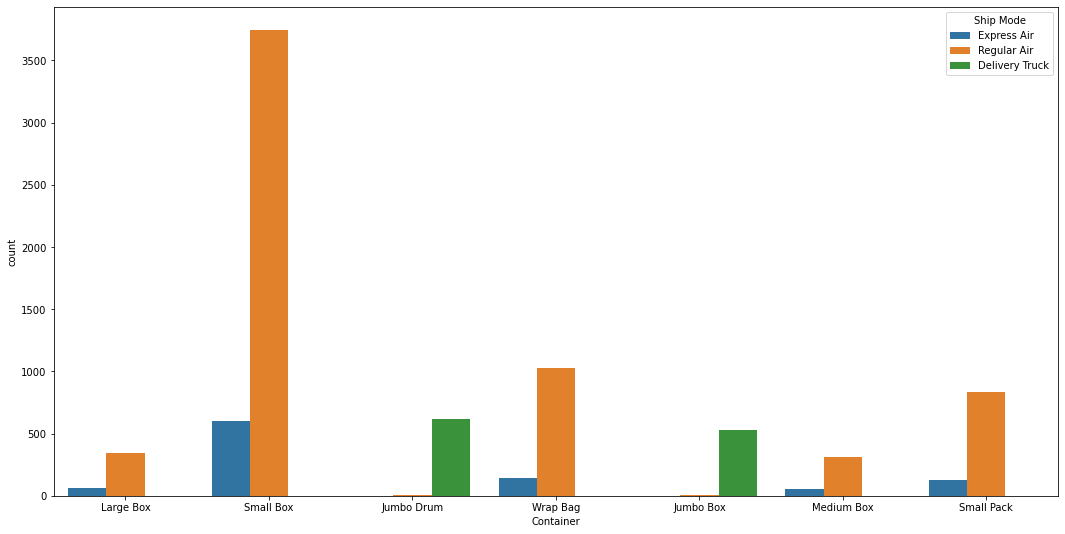

In [9]:
plt.figure(figsize = (18,9))
sns.countplot(x = "Container", hue = "Ship Mode", data = df)
plt.show()

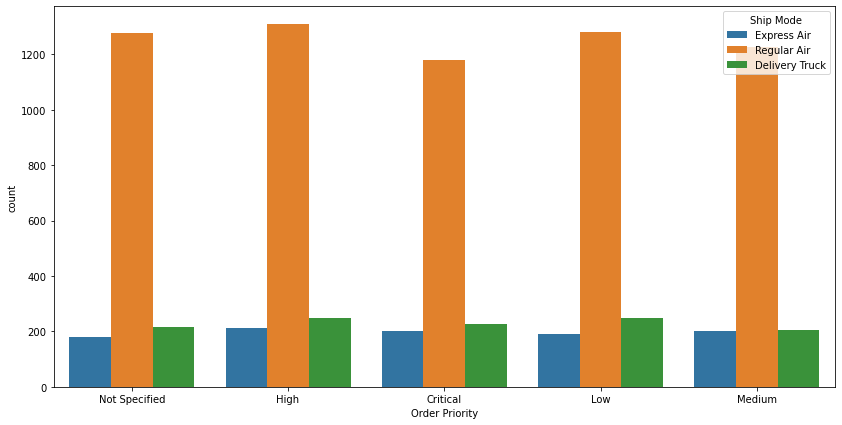

In [10]:
plt.figure(figsize = (14,7))
sns.countplot(x = "Order Priority", hue = "Ship Mode", data = df)
plt.show()

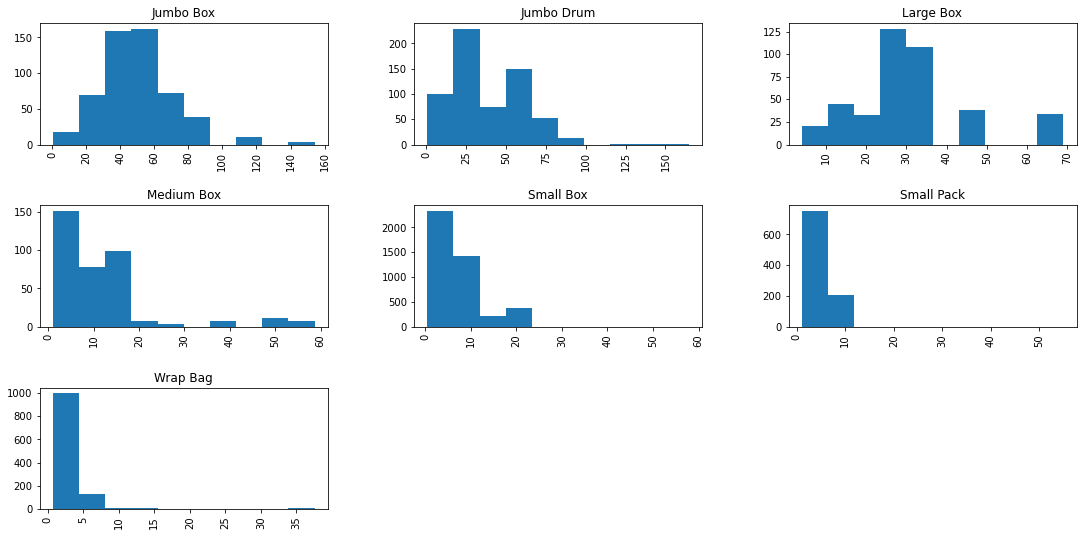

In [11]:
df.hist(by = "Container", column = "Shipping Amount", figsize =( 18,9))
plt.show()

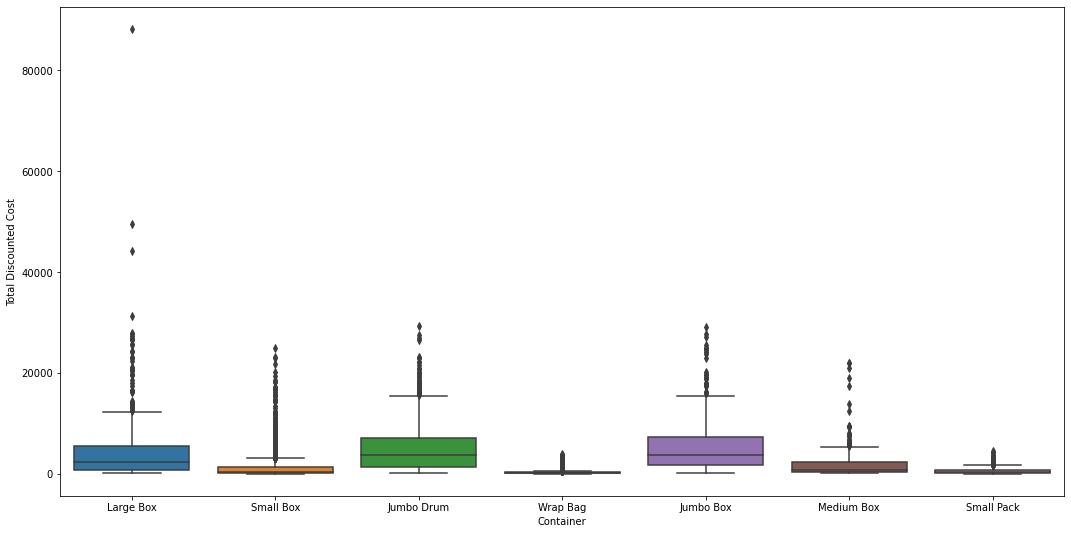

In [12]:
plt.figure(figsize = (18,9))
sns.boxplot(x = "Container", y = "Total Discounted Cost", data = df)
plt.show()

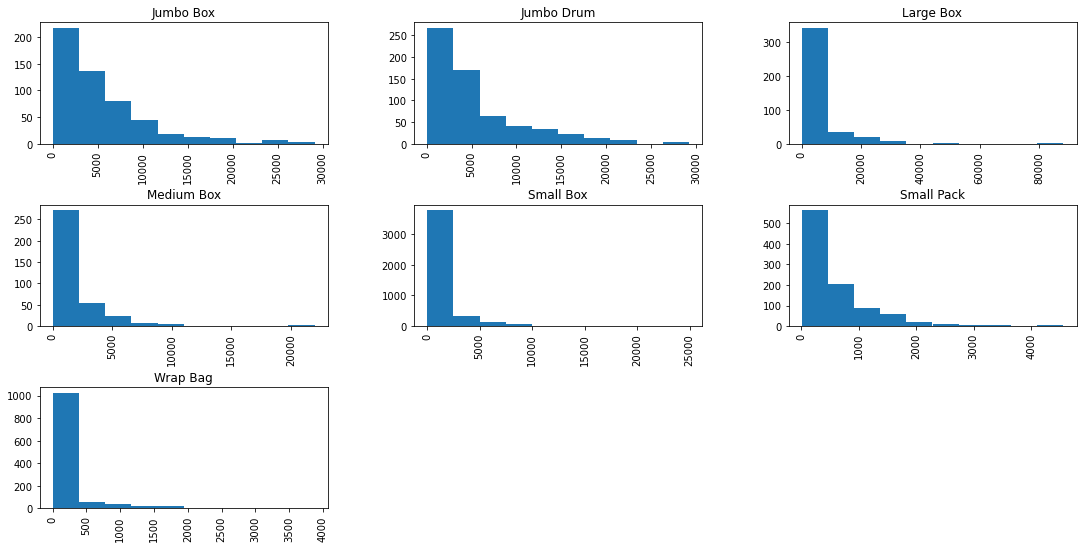

In [13]:
df.hist(by = "Container", column = "Total Discounted Cost", figsize =( 18,9))
plt.show()

The histograms above show that majority of the goods with regard to their containers are below 1000 with the histogram distributions showing a skewness to the right. This indicates there are more values 

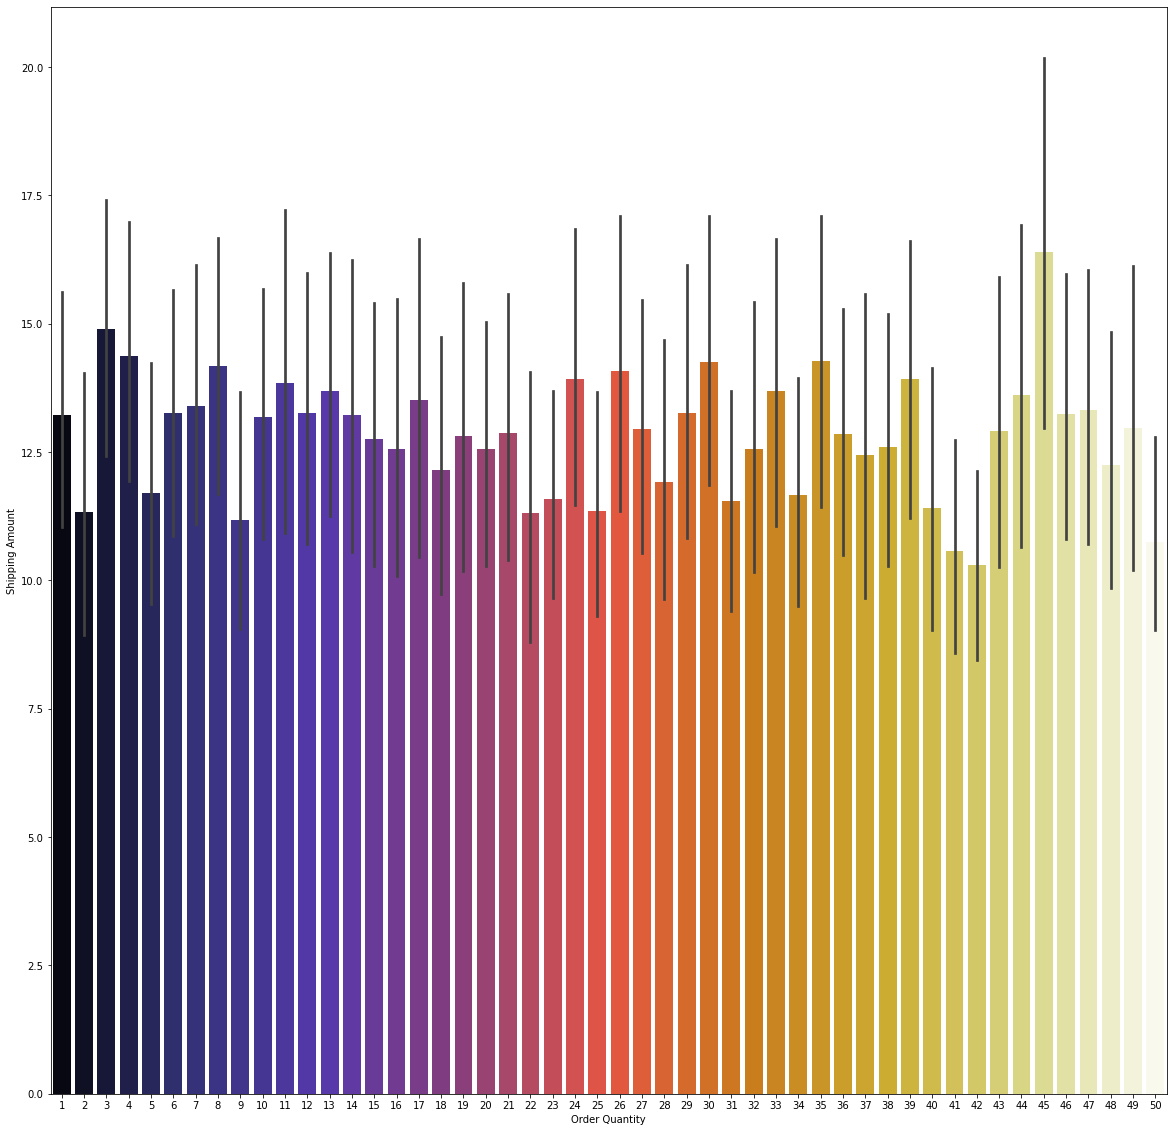

In [14]:
plt.figure(figsize = (20,20))
sns.barplot(x = 'Order Quantity', y = 'Shipping Amount', data = df, palette = "CMRmap")
plt.show()

In [17]:
con_features = df[con_cols].astype(int)

In [19]:
con_features["Container"] = df['Container']

In [15]:
con_cols = ['Cost', 'Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount', 'Order Quantity', 'Unit Cost Price']
con_df = df[con_cols]

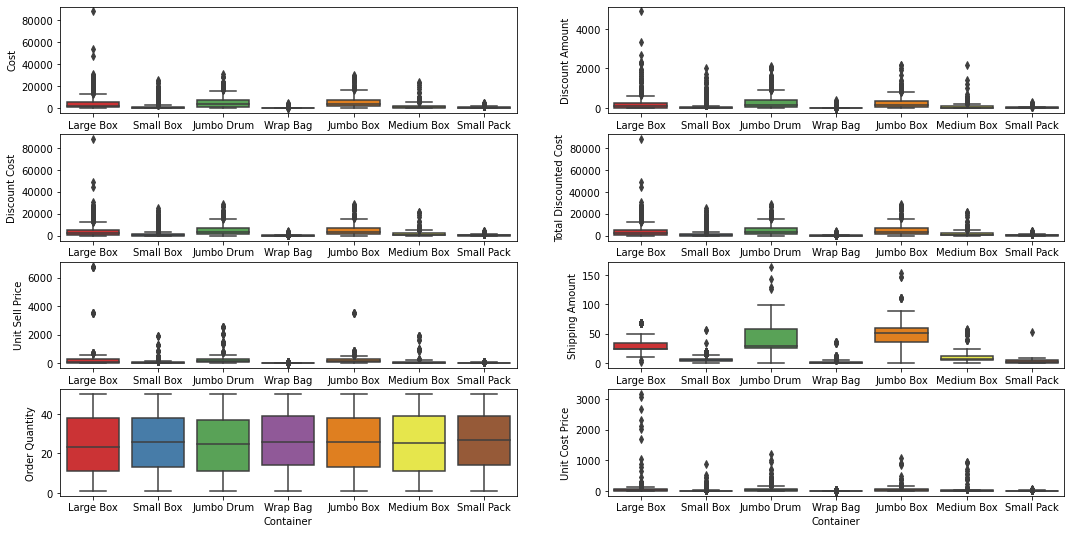

In [20]:
plt.figure(figsize= (18,9))
for i in range (8):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x="Container", y=con_features.columns[i], data=con_features, palette="Set1")
plt.show()

In [21]:
con_features.dtypes

Cost                      int32
Discount Amount           int32
Discount Cost             int32
Total Discounted Cost     int32
Unit Sell Price           int32
Shipping Amount           int32
Order Quantity            int32
Unit Cost Price           int32
Container                object
dtype: object

In [23]:
#Importing the Datetime library to format the date columns 
from datetime import datetime, date, time

df['Order Date'] = pd.to_datetime(df["Order Date"], errors= "coerce")
df['Ship Date'] = pd.to_datetime(df["Ship Date"], errors= "coerce")

In [43]:
import datetime as dt
df["Ship Day"]=df['Ship Date'].dt.day_name()
df['Ship Year']=df['Ship Date'].dt.year
df['Ship Month']=df['Ship Date'].dt.month_name()

In [26]:
df.dtypes

Order ID                          int64
Customer ID                      object
Sales Person                     object
Order Date               datetime64[ns]
Ship Date                datetime64[ns]
Order Priority                   object
SKU Code                         object
Order Quantity                    int64
Unit Sell Price                 float64
Unit Cost Price                   int64
Discount Percent                 object
Shipping Amount                 float64
Ship Mode                        object
Container                        object
Cost                            float64
Discount Amount                 float64
Discount Cost                   float64
Total Discounted Cost           float64
Ship Day                         object
Ship Year                         int64
Ship Month                        int64
dtype: object

C:\Users\Damilola Ayodele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


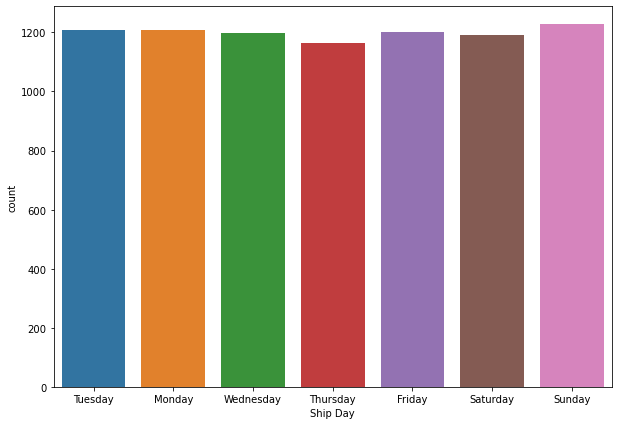

In [27]:
#Plot showing the ship days count
plt.figure(figsize=(10,7))
sns.countplot(df["Ship Day"])
plt.show()

C:\Users\Damilola Ayodele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


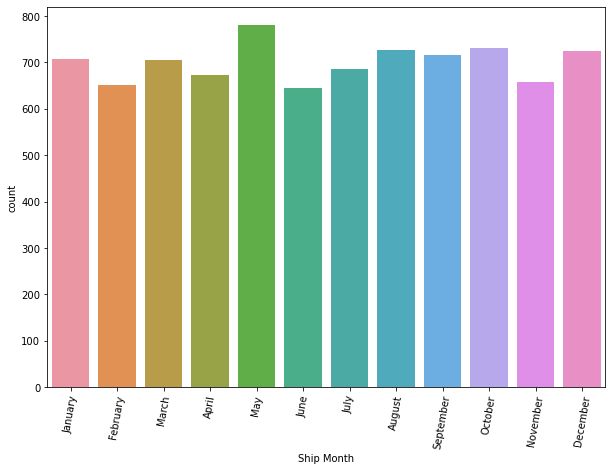

In [47]:
#Plot showing the ship Month count
plt.figure(figsize=(10,7))
plot = sns.countplot(df["Ship Month"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=80);
plt.show()

In [28]:
ship_day = df.groupby('Ship Day')['Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount'].mean().round(2)
ship_day

C:\Users\DAMILO~1\AppData\Local\Temp/ipykernel_13712/13918225.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ship_day = df.groupby('Ship Day')['Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount'].mean().round(2)


,Discount Amount,Discount Cost,Total Discounted Cost,Unit Sell Price,Shipping Amount
Ship Day,,,,,
Friday,91.21,1807.45,1820.38,98.31,12.94
Monday,89.07,1610.66,1623.62,81.23,12.95
Saturday,89.58,1769.72,1782.30,95.57,12.58
Sunday,83.50,1739.67,1752.18,85.18,12.51
Thursday,95.18,1659.13,1671.35,77.46,12.22
Tuesday,97.49,1844.80,1858.31,88.04,13.51
Wednesday,93.15,1851.89,1865.03,99.50,13.14


In [33]:
df

,Order ID,Customer ID,Sales Person,Order Date,Ship Date,Order Priority,SKU Code,Order Quantity,Unit Sell Price,Unit Cost Price,...,Shipping Amount,Ship Mode,Container,Cost,Discount Amount,Discount Cost,Total Discounted Cost,Ship Day,Ship Year,Ship Month
0,13729,C508,Mr Robert Carlton,2017-01-01,2017-01-03,Not Specified,SKU947,9,95.99,1,...,35.00,Express Air,Large Box,863.91,69.1128,794.7972,829.7972,Tuesday,2017,1
1,28774,C372,Miss Roseanna Marr,2017-01-01,2017-01-02,High,SKU937,32,5.98,1,...,4.69,Regular Air,Small Box,191.36,19.1360,172.2240,176.9140,Monday,2017,1
2,9285,C212,Mr Robert Carlton,2017-01-02,2017-01-04,Critical,SKU363,3,40.98,6,...,2.99,Regular Air,Small Box,122.94,7.3764,115.5636,118.5536,Wednesday,2017,1
3,37537,C015,Mr Robert Carlton,2017-01-02,2017-01-02,Low,SKU052,4,291.73,58,...,48.80,Delivery Truck,Jumbo Drum,1166.92,0.0000,1166.9200,1215.7200,Monday,2017,1
4,37537,C015,Mr Robert Carlton,2017-01-02,2017-01-04,Low,SKU063,43,100.98,45,...,45.00,Delivery Truck,Jumbo Drum,4342.14,303.9498,4038.1902,4083.1902,Wednesday,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Mr Robert Carlton,2020-12-30,2020-12-30,Low,SKU979,31,19.98,9,...,4.00,Regular Air,Small Box,619.38,0.0000,619.3800,623.3800,Wednesday,2020,12
8395,49344,C494,Mr Robert Carlton,2020-12-30,2020-12-30,Low,SKU883,1,832.81,14,...,24.49,Regular Air,Medium Box,832.81,74.9529,757.8571,782.3471,Wednesday,2020,12
8396,47815,C377,Mrs Gail Johnson,2020-12-30,2020-12-30,Not Specified,SKU114,45,13.73,5,...,6.85,Regular Air,Wrap Bag,617.85,49.4280,568.4220,575.2720,Wednesday,2020,12
8397,50950,C768,Mrs Gail Johnson,2020-12-30,2020-12-30,Not Specified,SKU066,6,60.98,5,...,30.00,Delivery Truck,Jumbo Drum,365.88,21.9528,343.9272,373.9272,Wednesday,2020,12


In [51]:
df_yr1 = df.loc[df['Ship Date']>="2020-01-01", ['Ship Date','Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount', 'Ship Month', 'Ship Day']]
df_yr1

,Ship Date,Discount Amount,Discount Cost,Total Discounted Cost,Unit Sell Price,Shipping Amount,Ship Month,Ship Day
6281,2020-01-01,736.4406,9784.1394,9810.1394,500.98,26.00,January,Wednesday
6291,2020-01-02,0.0000,63.9200,68.9500,7.99,5.03,January,Thursday
6295,2020-01-01,1.4396,70.5404,71.6404,35.99,1.10,January,Wednesday
6297,2020-01-07,67.4865,2182.0635,2202.0535,49.99,19.99,January,Tuesday
6298,2020-01-05,15.9200,183.0800,186.0500,3.98,2.97,January,Sunday
...,...,...,...,...,...,...,...,...
8394,2020-12-30,0.0000,619.3800,623.3800,19.98,4.00,December,Wednesday
8395,2020-12-30,74.9529,757.8571,782.3471,832.81,24.49,December,Wednesday
8396,2020-12-30,49.4280,568.4220,575.2720,13.73,6.85,December,Wednesday
8397,2020-12-30,21.9528,343.9272,373.9272,60.98,30.00,December,Wednesday


C:\Users\Damilola Ayodele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


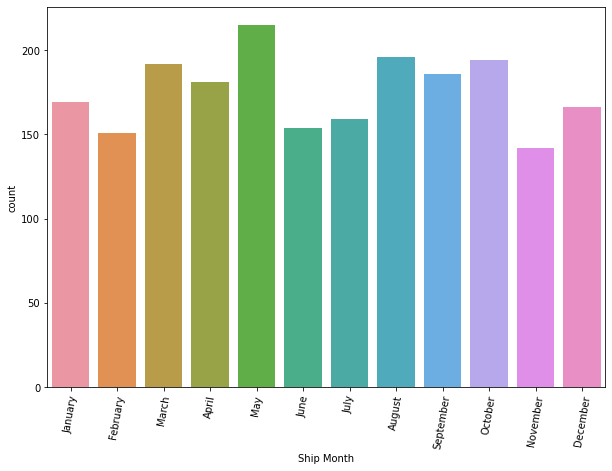

In [52]:
#Plot showing the ship Month count
plt.figure(figsize=(10,7))
plot = sns.countplot(df_yr1["Ship Month"])
plot.set_xticklabels(plot.get_xticklabels(), rotation=80);
plt.show()

In [ ]:
ship_day = df.groupby('Ship Month')['Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount'].mean().round(2)
ship_day

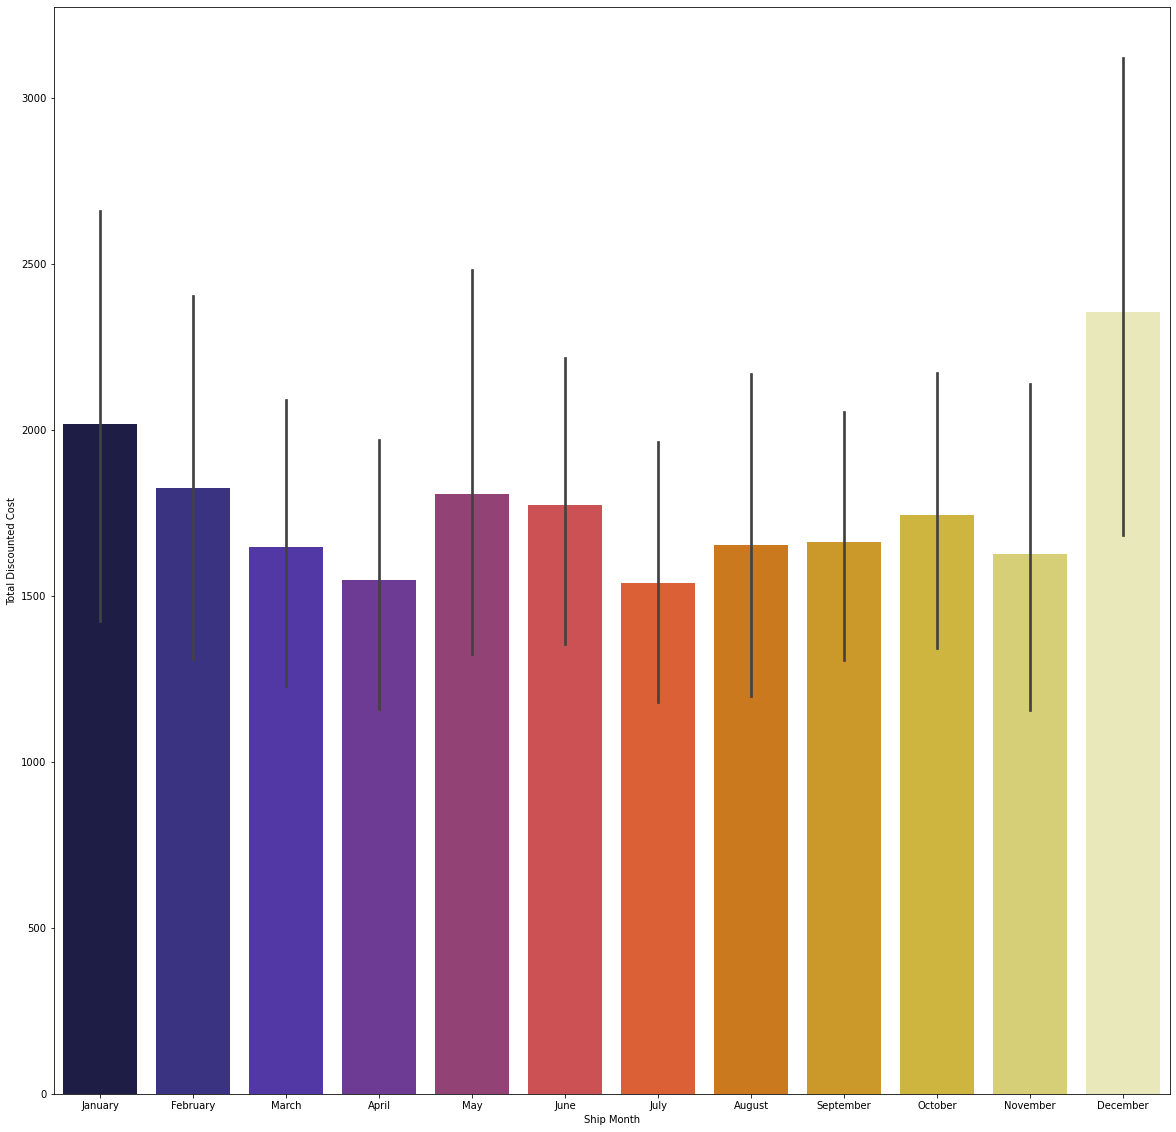

In [54]:
plt.figure(figsize = (20,20))
sns.barplot(x = 'Ship Month', y = 'Total Discounted Cost', data = df_yr1, palette = "CMRmap")
plt.show()

In [40]:
corr = df.corr()
corr['Shipping Amount']

Order ID                -0.004582
Order Quantity          -0.011457
Unit Sell Price          0.239959
Unit Cost Price          0.194791
Shipping Amount          1.000000
Cost                     0.427822
Discount Amount          0.344250
Discount Cost            0.427244
Total Discounted Cost    0.431221
Ship Year               -0.008038
Ship Month               0.003519
Name: Shipping Amount, dtype: float64

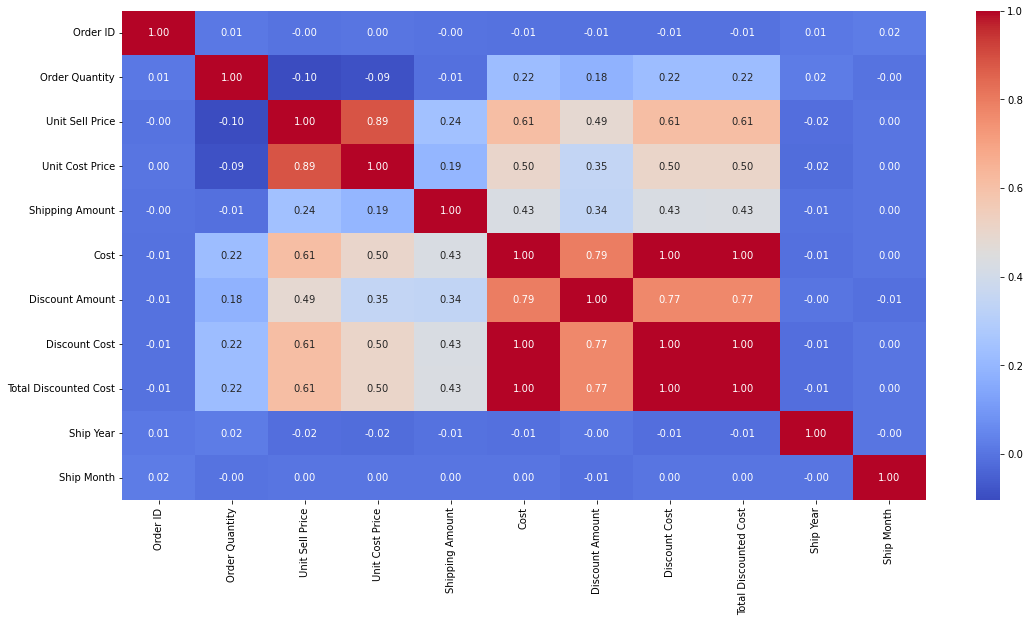

In [41]:
plt.figure(figsize = (18,9))
sns.heatmap(corr, annot = True, fmt =".2f", cmap = "coolwarm")
plt.show()

In [44]:
conn = df.drop(["Shipping Amount", 'Order Date', 'Ship Date'], axis = 1)
conn

,Order ID,Customer ID,Sales Person,Order Priority,SKU Code,Order Quantity,Unit Sell Price,Unit Cost Price,Discount Percent,Ship Mode,Container,Cost,Discount Amount,Discount Cost,Total Discounted Cost,Ship Day,Ship Year,Ship Month
0,13729,C508,Mr Robert Carlton,Not Specified,SKU947,9,95.99,1,8%,Express Air,Large Box,863.91,69.1128,794.7972,829.7972,Tuesday,2017,January
1,28774,C372,Miss Roseanna Marr,High,SKU937,32,5.98,1,10%,Regular Air,Small Box,191.36,19.1360,172.2240,176.9140,Monday,2017,January
2,9285,C212,Mr Robert Carlton,Critical,SKU363,3,40.98,6,6%,Regular Air,Small Box,122.94,7.3764,115.5636,118.5536,Wednesday,2017,January
3,37537,C015,Mr Robert Carlton,Low,SKU052,4,291.73,58,0%,Delivery Truck,Jumbo Drum,1166.92,0.0000,1166.9200,1215.7200,Monday,2017,January
4,37537,C015,Mr Robert Carlton,Low,SKU063,43,100.98,45,7%,Delivery Truck,Jumbo Drum,4342.14,303.9498,4038.1902,4083.1902,Wednesday,2017,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Mr Robert Carlton,Low,SKU979,31,19.98,9,0%,Regular Air,Small Box,619.38,0.0000,619.3800,623.3800,Wednesday,2020,December
8395,49344,C494,Mr Robert Carlton,Low,SKU883,1,832.81,14,9%,Regular Air,Medium Box,832.81,74.9529,757.8571,782.3471,Wednesday,2020,December
8396,47815,C377,Mrs Gail Johnson,Not Specified,SKU114,45,13.73,5,8%,Regular Air,Wrap Bag,617.85,49.4280,568.4220,575.2720,Wednesday,2020,December
8397,50950,C768,Mrs Gail Johnson,Not Specified,SKU066,6,60.98,5,6%,Delivery Truck,Jumbo Drum,365.88,21.9528,343.9272,373.9272,Wednesday,2020,December


Using mutual information method to check the relationship between the features and the target(**Shipping Amount**)

In [48]:
y = df["Shipping Amount"]
X = conn.copy()

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

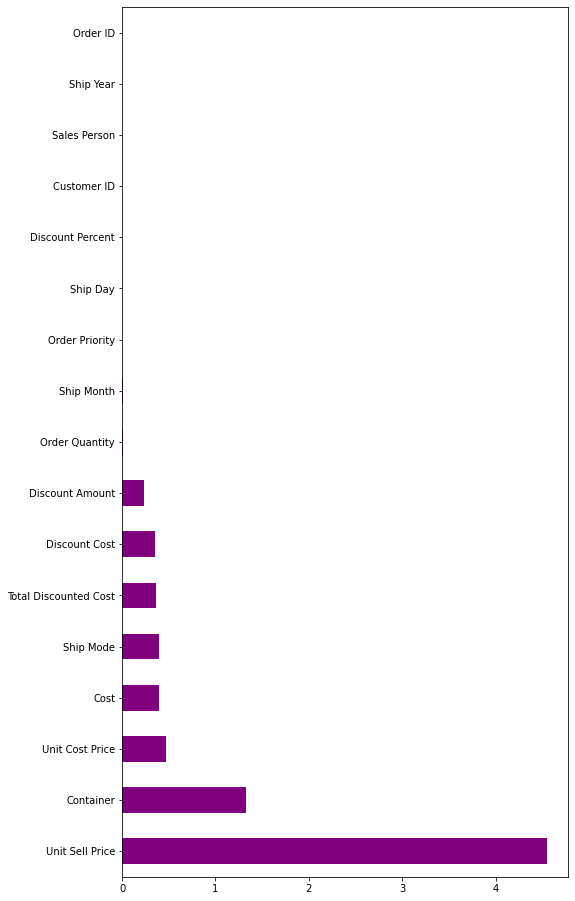

In [49]:
from sklearn.feature_selection import mutual_info_regression

importances = mutual_info_regression(X, y, discrete_features = discrete_features)
feat_importance = pd.Series(importances, index =X.columns)
mi_scores = feat_importance.sort_values(ascending=False)[1:]
plt.figure(figsize = (8, 16))
mi_scores.plot(kind = "barh", color = "purple")
plt.show()

### Preprocessing

In [ ]:
mod_cols = ['Cost', 'Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount', 'Unit Cost Price']
int_df = df[mod_cols]

In [ ]:
int_df = df[mod_cols].astype(int)

In [ ]:
int_df['Discount Percent'] = df['Discount Percent'].apply(lambda x: x.split('%')[0]).astype(int)*0.01
int_df

In [ ]:
cols_obj = ['Container', 'Ship Mode', 'Customer ID', 'Order Priority']
obj_df = df[cols_obj]
obj_df

In [ ]:
obj_df['Customer ID'].value_counts()[:40]

In [ ]:
obj_df

In [ ]:
int_df

## Building Models